In [79]:
## intall the datasets module

!pip install -qq datasets

In [2]:
## we download and load our amazon review dataset from the datasets module

# The dataset consists of train, validation and test datasets, split into 20000 in train dataset 
#5000 in test and validation datasets
from datasets import load_dataset

english_dataset = load_dataset("amazon_reviews_multi", "en")
english_dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [4]:
## function for picking and printing random samples of reviews

def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['review_title']}'")
        print(f"'>> Review: {example['review_body']}'")


show_samples(english_dataset)


'>> Title: Worked in front position, not rear'
'>> Review: 3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.'

'>> Title: meh'
'>> Review: Does it’s job and it’s gorgeous but mine is falling apart, I had to basically put it together again with hot glue'

'>> Title: Can't beat these for the money'
'>> Review: Bought this for handling miscellaneous aircraft parts and hanger "stuff" that I needed to organize; it really fit the bill. The unit arrived quickly, was well packaged and arrived intact (always a good sign). There are five wall mounts-- three on the top and two on the bottom. I wanted to mount it on the wall, so all I had to do was to remove the top two layers of plastic drawers, as well as the bottom corner drawers, place it when I wanted and mark it; I then used some of the new plastic screw in wall anchors (the 50 pound variety) and it easily mounted to the wall. 

In [10]:
# we format our datset into pandas framework to perform data analysis

english_dataset.set_format("pandas")
english_df = english_dataset["train"][:]
# Show counts for top 20 products
english_df["product_category"].value_counts()[:20]

home                      17679
apparel                   15951
wireless                  15717
other                     13418
beauty                    12091
drugstore                 11730
kitchen                   10382
toy                        8745
sports                     8277
automotive                 7506
lawn_and_garden            7327
home_improvement           7136
pet_products               7082
digital_ebook_purchase     6749
pc                         6401
electronics                6186
office_product             5521
shoes                      5197
grocery                    4730
book                       3756
Name: product_category, dtype: int64

In [11]:
english_df['review_title'].value_counts()[:20]

Three Stars       4169
Four Stars        3932
Five Stars        3918
Two Stars         3730
One Star          3435
Disappointed       683
Great product      437
Good               421
Good product       345
Great              345
Poor quality       336
Ok                 327
Nice               300
Meh                290
Cheap              271
Waste of money     252
Good quality       235
Cute               235
Perfect            233
Not worth it       229
Name: review_title, dtype: int64

In [7]:
import matplotlib.pyplot as plt

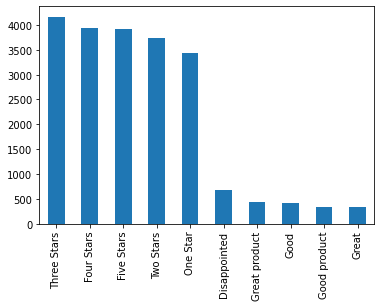

In [29]:
# Visualization of datsest showing most common titles and their counts

english_df['review_title'].value_counts()[:10].plot(kind='bar')


In [30]:
import nltk
from nltk.corpus import stopwords

In [31]:
## we filter all the reviews to products containing only books and their reviews

def filter_books(example):
    return (
        example["product_category"] == "book"
        or example["product_category"] == "digital_ebook_purchase"
    )

In [32]:
english_dataset.reset_format()

In [33]:
# filter for only books
english_books = english_dataset.filter(filter_books)
show_samples(english_books)

  0%|          | 0/200 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]


'>> Title: I'm dissapointed.'
'>> Review: I guess I had higher expectations for this book from the reviews. I really thought I'd at least like it. The plot idea was great. I loved Ash but, it just didnt go anywhere. Most of the book was about their radio show and talking to callers. I wanted the author to dig deeper so we could really get to know the characters. All we know about Grace is that she is attractive looking, Latino and is kind of a brat. I'm dissapointed.'

'>> Title: Good art, good price, poor design'
'>> Review: I had gotten the DC Vintage calendar the past two years, but it was on backorder forever this year and I saw they had shrunk the dimensions for no good reason. This one has good art choices but the design has the fold going through the picture, so it's less aesthetically pleasing, especially if you want to keep a picture to hang. For the price, a good calendar'

'>> Title: Helpful'
'>> Review: Nearly all the tips useful and. I consider myself an intermediate to a

In [34]:
# create an english books datset from the overall amazon reviews datset

from datasets import concatenate_datasets, DatasetDict

books_dataset = DatasetDict()

for split in english_books.keys():
    books_dataset[split] = concatenate_datasets(
        [english_books[split]]
    )
    books_dataset[split] = books_dataset[split].shuffle(seed=42)

# Peek at a few examples
show_samples(books_dataset)


'>> Title: Never showed up'
'>> Review: Ordered it on a friday and it never came. I waited until the following Wednesday and still nothing. :( plus I can't get a refund because I have nothing TO SEND BACK BECAUSE IT NEVER SHOWED UP'

'>> Title: Trite. Patronizing. Shallow.'
'>> Review: Do yourself a favor and check it out from the library before buying this book. Wish I had. Trust your gut instinct. That's it. Nothing more.'

'>> Title: We ordered this book back in Sept and never received ...'
'>> Review: We ordered this book back in Sept and never received it. There is now no tracking information or any way to get ahold of the seller.'


In [35]:
# filter books datset based on the review title column being more than 2 words
books_dataset = books_dataset.filter(lambda x: len(x["review_title"].split()) > 2)

  0%|          | 0/11 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [83]:
# install the transformers module

!pip install -qq transformers

In [37]:
## from the transformers module load the gpt-2 model

from transformers import AutoTokenizer

model_checkpoint = "gpt2"


In [38]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.3 MB/s 


In [39]:
## create the gpt-2 tokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [40]:
inputs = tokenizer("This is Sparta. It is so beautiful ")
inputs

{'input_ids': [1212, 318, 20711, 64, 13, 632, 318, 523, 4950, 220], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [41]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['This', 'Ġis', 'ĠSpart', 'a', '.', 'ĠIt', 'Ġis', 'Ġso', 'Ġbeautiful', 'Ġ']

In [42]:
## define the max input length of the review given to the model
## define the max output length of the summary generated

max_input_length = 512
max_target_length = 30


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["review_body"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["review_title"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    model_inputs["labels_mask"] = labels["attention_mask"]
    return model_inputs

In [43]:
# tokenizing the dataset

tokenized_datasets = books_dataset.map(preprocess_function, batched=True)

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [80]:

## install the rouge score module

!pip install -qq rouge_score

In [81]:
!pip install -qq evaluate

In [46]:
## evaluating the accuracy and precision of our language models
import evaluate

rouge_score = evaluate.load("rouge")

In [47]:
## Give a sample summary

generated_summary = "This is Sparta. It is so beautiful and i love it "
reference_summary = "This is Sparta. It is so beautiful "

In [48]:
## get the score for the sample

scores = rouge_score.compute(
    predictions=[generated_summary], references=[reference_summary]
)
scores

{'rouge1': 0.7777777777777778,
 'rouge2': 0.7499999999999999,
 'rougeL': 0.7777777777777778,
 'rougeLsum': 0.7777777777777778}

In [82]:
!pip install -qq nltk

In [50]:

import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
##import nltk tokenizer and tokenize a review

from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(books_dataset["train"][1]["review_body"]))

Incorrect book mailed.
I’m on a time constraint with school and now I have the wrong book with less time to get the correct one.


In [52]:
## create a simple language model and evaluate the summary.
def evaluate_baseline(dataset, metric):
    summaries = [three_sentence_summary(text) for text in dataset["review_body"]]
    return metric.compute(predictions=summaries, references=dataset["review_title"])

In [78]:
## evaluate the baseline model
import pandas as pd

score = evaluate_baseline(books_dataset["validation"], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, round(score[rn], 2)) for rn in rouge_names)
rouge_dict

{'rouge1': 0.15, 'rouge2': 0.08, 'rougeL': 0.14, 'rougeLsum': 0.15}

In [54]:
## creating the frozen gpt2 model
from transformers import AutoModel

model = AutoModel.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [59]:
## getting the model parameters
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT 2  size: {model_size/1000**2:.1f}M parameters")

GPT 2  size: 124.4M parameters


In [60]:
## gives the arguments for all hyperp-parameters for the model

from transformers import Seq2SeqTrainingArguments

batch_size = 8
num_train_epochs = 8
# Show the training loss with every epoch
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = model_checkpoint.split("/")[-1]

args = Seq2SeqTrainingArguments(
    output_dir=f"{model_name}-finetuned-amazon-en-es",
    evaluation_strategy="epoch",
    learning_rate=5.6e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    logging_steps=logging_steps,
    push_to_hub=True,
)

In [61]:
# Defines the metrics to compute the summary predictions and the calculate measure

import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]
    # Compute ROUGE scores
    result = rouge_score.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract the median scores
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}


In [62]:
## impoerts the data collator for the model

from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [63]:
## remove the column names from the dataset

tokenized_datasets = tokenized_datasets.remove_columns(
    books_dataset["train"].column_names
)

In [64]:
## set the format of the daset to torch, so it converts to tensors 
tokenized_datasets.set_format("torch")

In [65]:
# creating the dataloader to feed the dataset to the models

from torch.utils.data import DataLoader

batch_size = 8
train_dataloader = DataLoader(
    tokenized_datasets["train"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=batch_size,
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], collate_fn=data_collator, batch_size=batch_size
)

In [66]:
## getting the optimizer and initialiing it

from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)

In [67]:
##  setting the training parameters and schedule

from transformers import get_scheduler

num_train_epochs = 10
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = num_train_epochs * num_update_steps_per_epoch

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)


In [68]:
## pre-processing the predictions and labels

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    # ROUGE expects a newline after each sentence
    preds = ["\n".join(nltk.sent_tokenize(pred)) for pred in preds]
    labels = ["\n".join(nltk.sent_tokenize(label)) for label in labels]

    return preds, labels

In [69]:
## loading the sample review into a list

review = []
summary = []
sample = books_dataset["train"].shuffle(seed=42).select(range(3))
for example in sample:
  review.append(example['review_body'])
  summary.append(example['review_title'])


In [71]:
!pip install -qq bert-extractive-summarizer

In [72]:
from summarizer import Summarizer,TransformerSummarizer

In [74]:
##loading a sample review into gpt2 and checking the summarized text 

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = GPT2_model(review[1], min_length=60)
print(full)

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

A sturdy board book with bright illustrations - a definite toddler pleaser!


In [77]:
## generated score from the model
def scores(generated_summary, reference_summary):
  scores = rouge_score.compute(
    predictions=[generated_summary], references=[reference_summary]
)
  return scores

scores(full, summary[1])

{'rouge1': 0.10526315789473685,
 'rouge2': 0.0,
 'rougeL': 0.10526315789473685,
 'rougeLsum': 0.10526315789473685}